In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import *
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_excel('dataset_Assignment-1_ML.xlsx')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          200 non-null    object 
 4   aspiration        203 non-null    object 
 5   doornumber        202 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        198 non-null    object 
 8   wheelbase         202 non-null    float64
 9   carlength         202 non-null    float64
 10  carwidth          200 non-null    float64
 11  carheight         198 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    201 non-null    object 
 15  enginesize        199 non-null    float64
 16  fuelsystem        197 non-null    object 
 1

In [4]:
df.isnull().sum()

car_ID               0
symboling            0
CarName              0
fueltype             5
aspiration           2
doornumber           3
carbody              0
drivewheel           7
wheelbase            3
carlength            3
carwidth             5
carheight            7
curbweight           0
enginetype           0
cylindernumber       4
enginesize           6
fuelsystem           8
boreratio            4
stroke              10
compressionratio     4
horsepower           0
peakrpm              0
citympg             12
highwaympg           9
price                0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,109.1,188.8,...,141.0,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,109.1,188.8,...,141.0,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,109.1,188.8,...,173.0,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,109.1,188.8,...,145.0,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470.0


In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.describe(include="all")

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,161.000000,161.000000,161,161,161,161,161,161,161.000000,161.000000,...,161.000000,161,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
unique,NaN,NaN,113,2,2,2,5,3,NaN,NaN,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,NaN,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,142,129,92,71,84,NaN,NaN,...,NaN,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,117.260870,0.857143,NaN,NaN,NaN,NaN,NaN,NaN,99.362733,175.714286,...,129.279503,NaN,3.371925,3.238758,10.412484,106.211180,5079.503106,24.527950,29.975155,13756.909938
std,56.364497,1.345628,NaN,NaN,NaN,NaN,NaN,NaN,6.201560,11.403584,...,42.282267,NaN,0.268881,0.341717,4.310607,39.929846,486.488439,5.805237,6.297768,7853.025789
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,88.600000,155.900000,...,70.000000,NaN,2.540000,2.070000,7.000000,52.000000,4150.000000,13.000000,16.000000,5118.000000
25%,68.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,95.700000,168.800000,...,98.000000,NaN,3.190000,3.070000,8.600000,76.000000,4800.000000,19.000000,25.000000,8238.000000
50%,125.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,97.300000,173.600000,...,121.000000,NaN,3.390000,3.255000,9.000000,95.000000,5000.000000,24.000000,30.000000,11245.000000
75%,165.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,102.700000,186.600000,...,145.000000,NaN,3.620000,3.400000,9.400000,116.000000,5500.000000,28.000000,33.000000,16630.000000


In [9]:
df.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [10]:
 len(df[df.duplicated()])

0

F:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

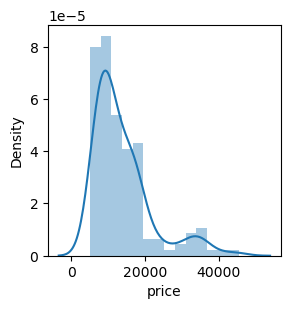

In [11]:
# exploring the price density 
plt.figure(figsize=(3,3))
sns.distplot(df['price'])

F:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

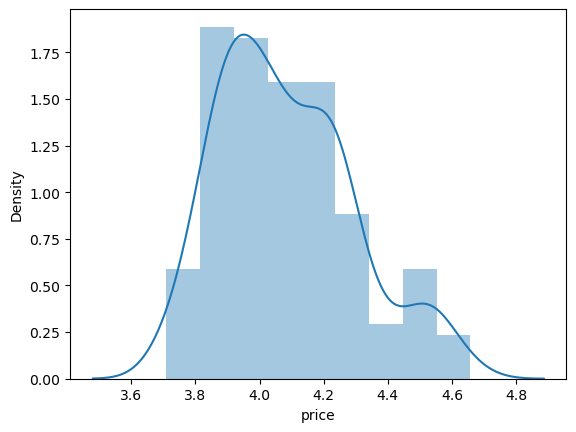

In [12]:
# since graph is right skewed so we are doing log transformation
sns.distplot(np.log10(df['price']))

In [13]:
numeric_features=df.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

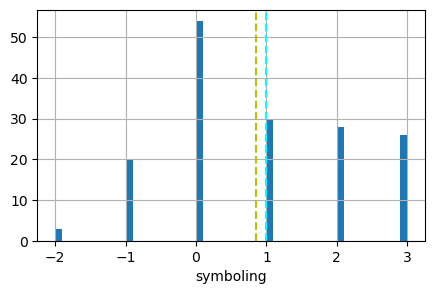

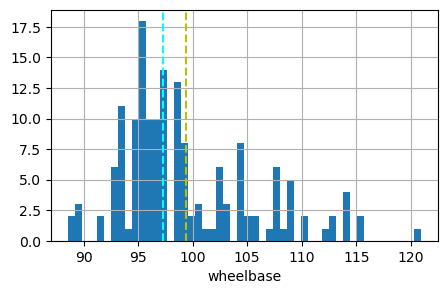

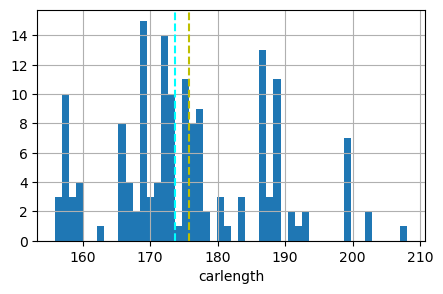

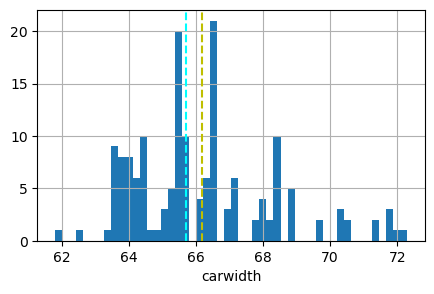

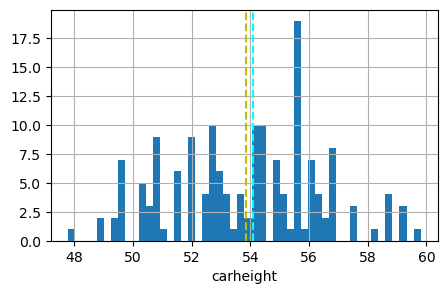

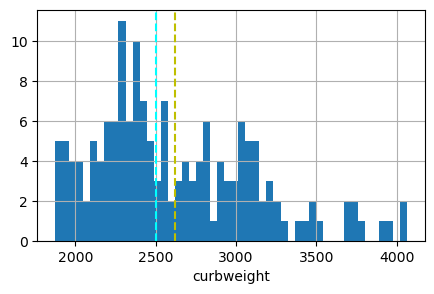

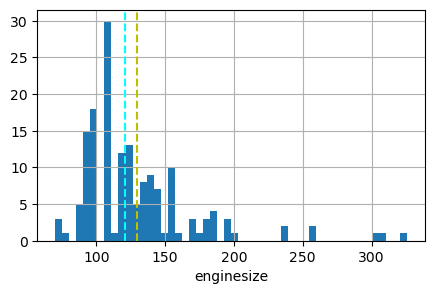

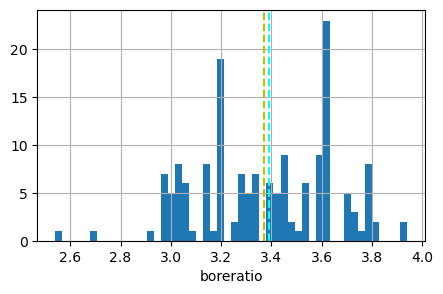

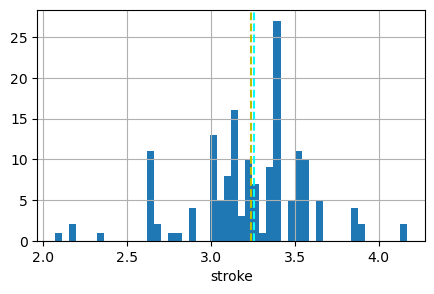

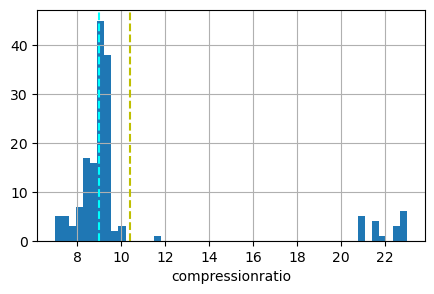

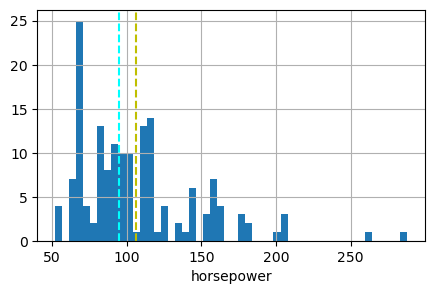

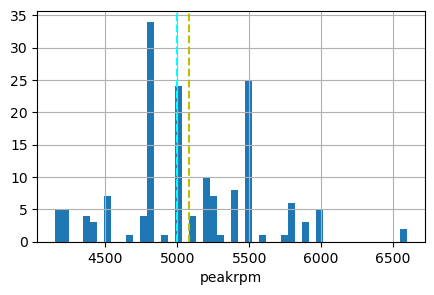

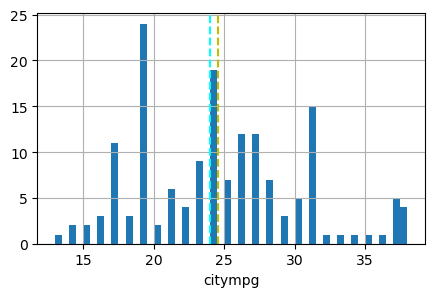

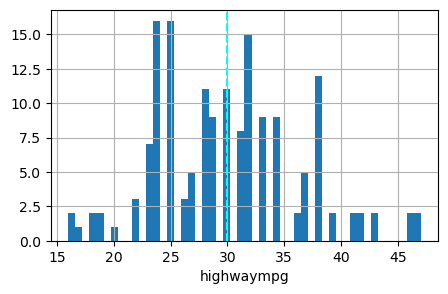

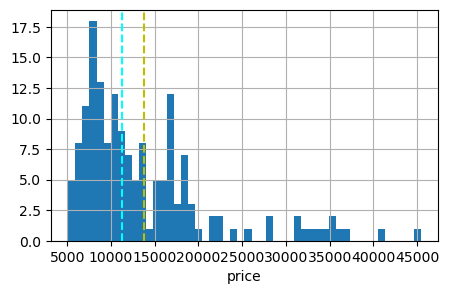

In [14]:
#to plot a histgram for all numerical feature except car_id
for col in numeric_features[1:]:
    plt.figure(figsize=(5,3))
    df[col].hist(bins=50)
    plt.xlabel(col)
    plt.axvline(df[col].mean(),color='y',linestyle='dashed')
    plt.axvline(df[col].median(),color='cyan',linestyle='dashed')

<AxesSubplot:title={'center':'correlation between all columns with all columns'}>

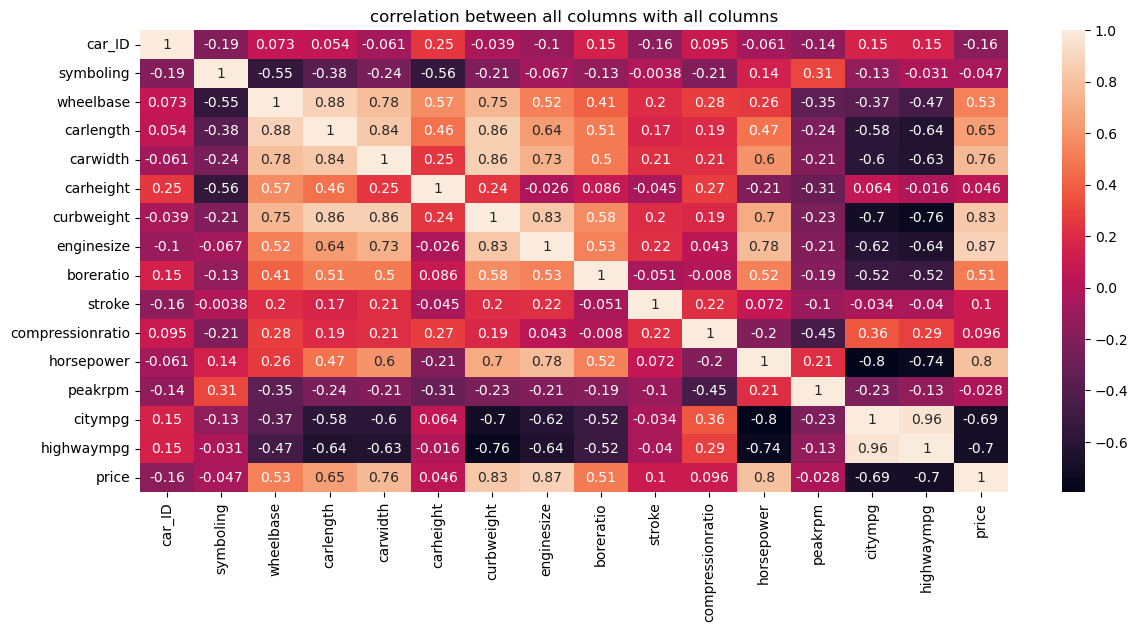

In [16]:
#correlation
correlation=df.corr()
plt.figure(figsize=(14,6))
plt.title('correlation between all columns with all columns')

sns.heatmap(correlation,annot=True)

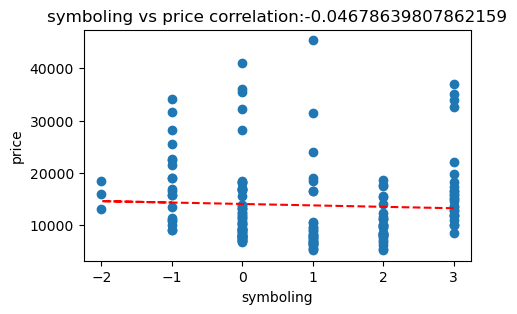

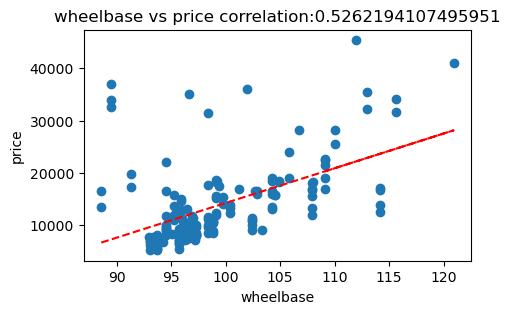

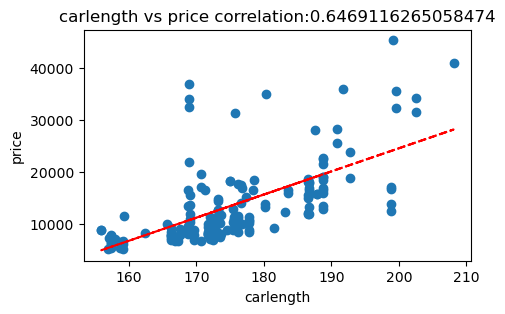

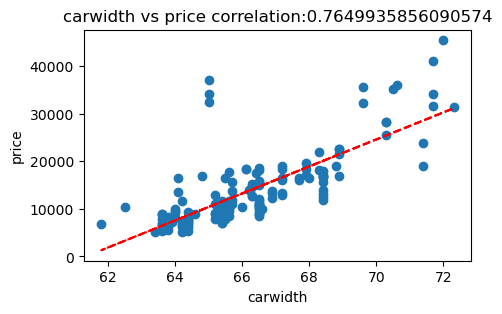

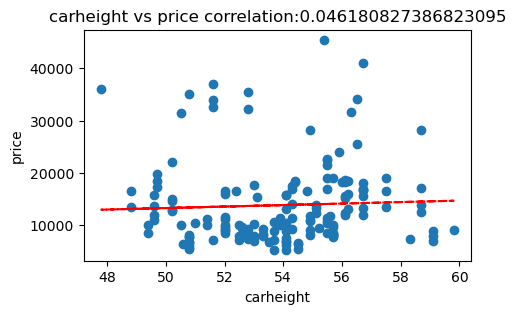

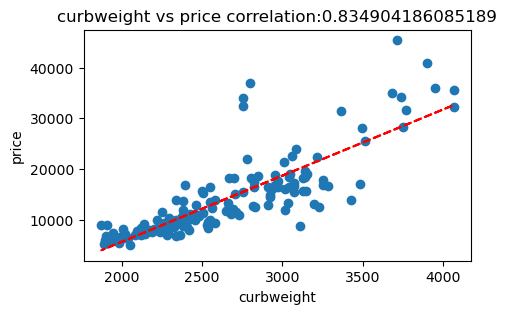

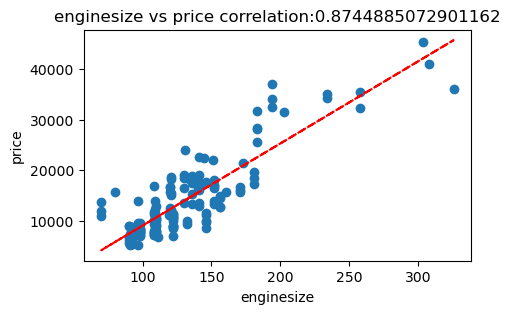

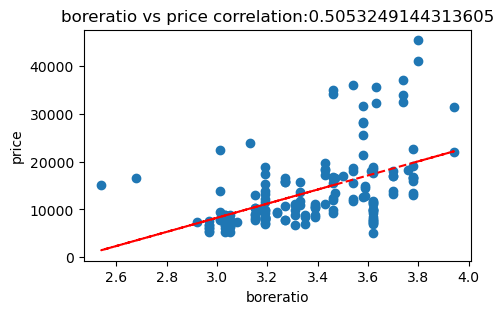

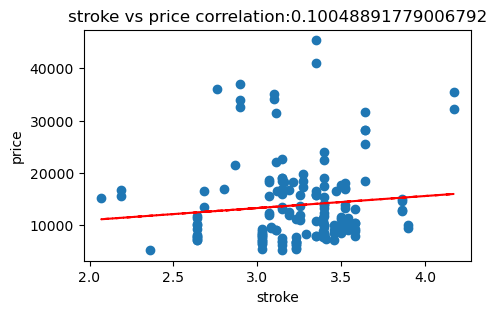

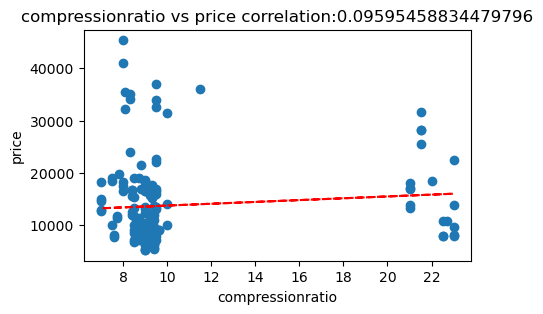

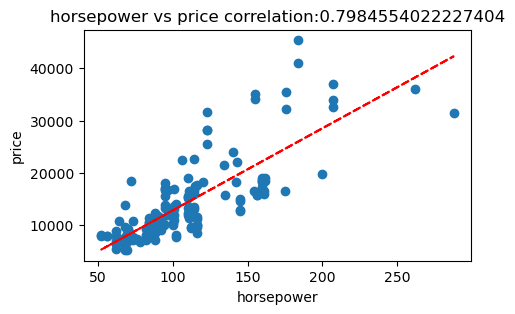

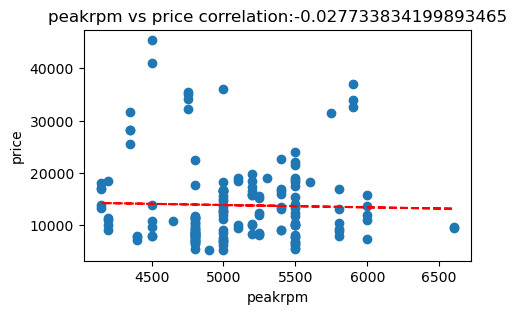

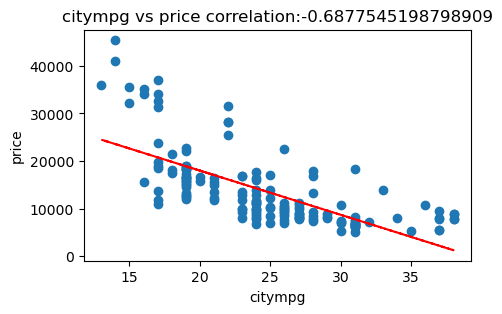

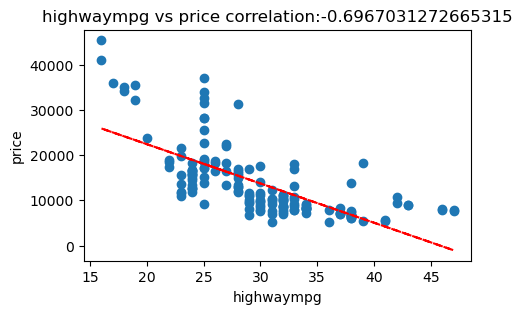

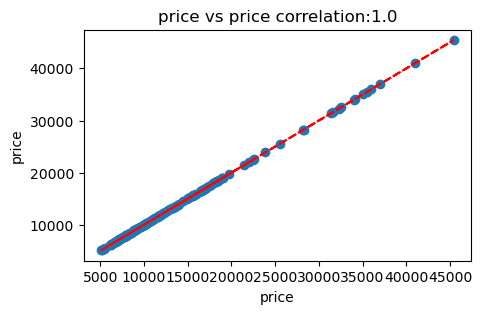

In [15]:
#graph to see how numerical features impact price (except car_id)
for col in numeric_features[1:]:
    plt.figure(figsize=(5,3))
    
    x=df[col]
    y=df['price']
    
    plt.scatter(x,y)
    
    correlation=x.corr(y)
    
    #labeling the axis
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col+' vs price correlation:'+str(correlation))
    
    #trying to find slope and constant for best fit line on the scatter plot
    m,a=np.polyfit(x,y,1)
    
    plt.plot(x,m*x+a,'r--')

In [17]:
# removing multicollenearity between citympg and highwaympg
df['mpg']=0.6*df['citympg']+0.4*df['highwaympg']
# converting carwidth and carlength to cararea
df['cararea']=df['carwidth']*df['carlength']

In [18]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mpg,cararea
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0,23.4,10820.08
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0,23.4,10820.08
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0,21.8,11213.60
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0,26.4,11690.92
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0,19.6,11726.24


In [19]:
# A high VIF indicates that the associated independent variable is highly collinear with 
#the other variables in the model.
#for checking multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# a function to return vif

def calculate_vif(x):
    
    
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    
    return(vif)

In [20]:

calculate_vif(df[[i for i in df.describe().columns if i not in ['car_ID','price']]])

F:\Softwares\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
0,symboling,2.863207
1,wheelbase,2211.124465
2,carlength,6691.390978
3,carwidth,3121.318293
4,carheight,1046.191635
5,curbweight,399.662698
6,enginesize,65.508391
7,boreratio,296.184264
8,stroke,113.558227
9,compressionratio,16.743982


In [23]:
numeric_features=['enginesize','compressionratio','mpg']

In [24]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'bmw 320i',
       'honda civic 1500 gl', 'honda accord', 'honda civic 1300',
       'honda prelude', 'honda civic', 'honda civic (auto)', 'isuzu MU-X',
       'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf',
       'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe',
       'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc',
       'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l',
       'mazda glc custom', 'buick electra 225 custom',
       'buick century luxus (sw)', 'buick century', 'buick skyhawk',
       'buick opel isuzu deluxe', 'buick skylark',
       'buick century special', 'buick regal sport coupe (turbo)',
       'mercury cougar', 'mitsubishi mirage', 'mitsubishi lancer',
       'mitsubishi outlander', 'mitsubishi g4', 'mitsubishi mirage g4',
       'mitsubishi montero', 'nis

In [25]:
df['company']=df['CarName'].str.split(' ',expand=True)[0]
df['company']=df['company'].replace({'toyouta': 'toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})

df['company'].value_counts()

toyota         32
mazda          15
subaru         12
volvo          11
peugeot        11
mitsubishi     10
volkswagen      9
buick           8
plymouth        7
honda           7
saab            6
audi            5
porsche         4
nissan          4
isuzu           4
jaguar          3
Volkswagen      3
alfa-romero     3
renault         2
Mazda           2
mercury         1
Porsche         1
bmw             1
Name: company, dtype: int64

In [26]:
categorical_columns=df.describe(include=['object','category']).columns
categorical_columns


Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'company'],
      dtype='object')

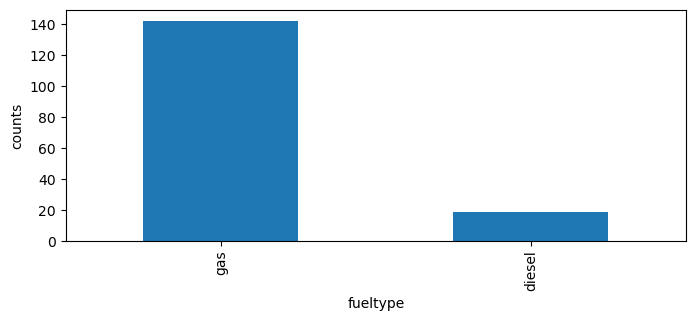

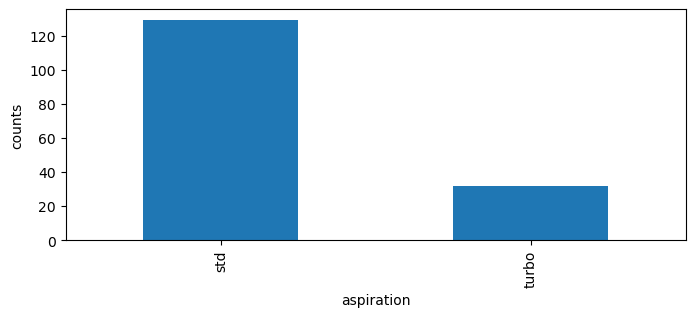

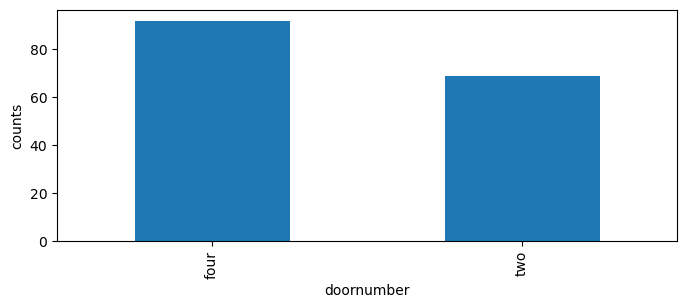

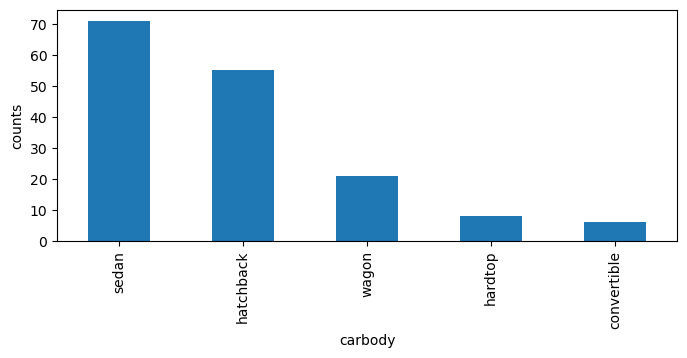

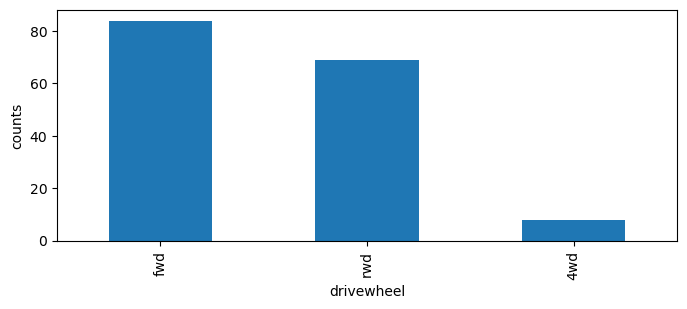

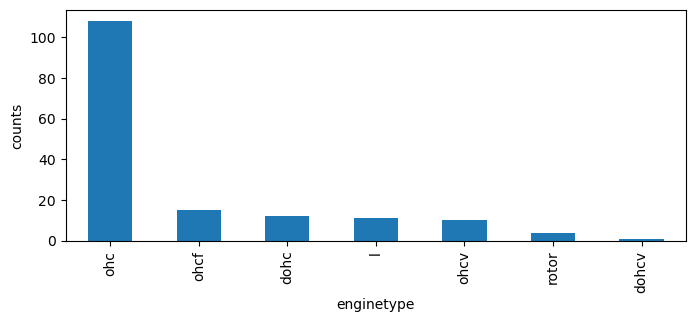

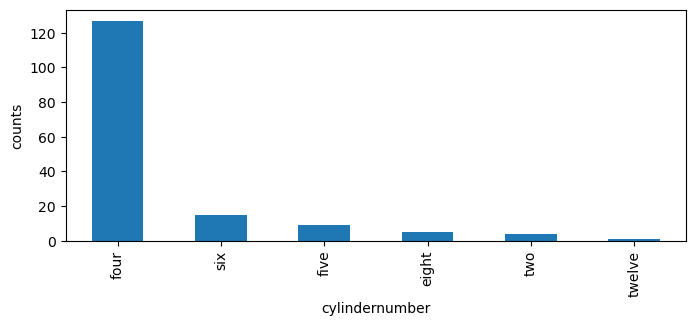

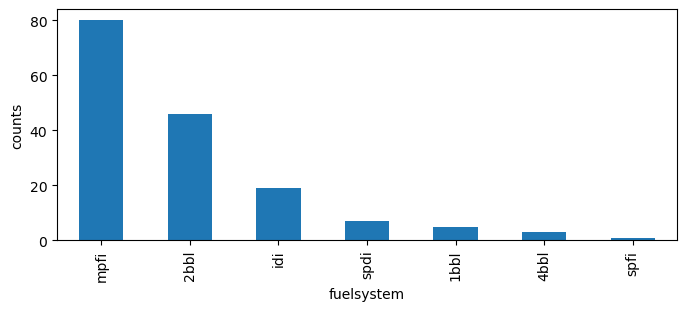

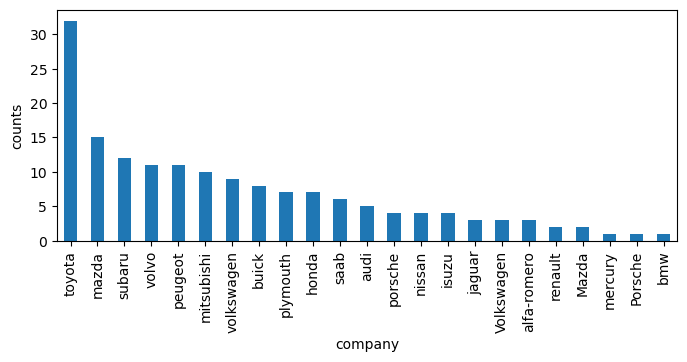

In [27]:
for col in categorical_columns[1:]:
    plt.figure(figsize=(8,3))
    counts=df[col].value_counts()
    counts.plot.bar()
#    df[col].hist(bins=20)
    plt.xlabel(col)
    plt.ylabel('counts')

In [28]:
#creating a table with mean price of car from different company
df_autox=pd.DataFrame(df.groupby(['company'])['price'].mean())
df_autox

,price
company,
Mazda,5645.000000
Porsche,32528.000000
Volkswagen,9783.333333
alfa-romero,15498.333333
audi,17889.000000
bmw,16925.000000
buick,33647.000000
honda,9530.714286
isuzu,8916.500000


In [29]:
df_autox.rename(columns={'price':'price_mean'},inplace=True)

In [30]:
#merging df and df_autox
df=df.merge(df_autox,on='company',how='left')

In [31]:
df['company_category']=df['price_mean'].apply(lambda x:0 if x<12000 else(1 if x<24000 else 2))

In [32]:
df['company_category'].value_counts()

0    103
1     42
2     16
Name: company_category, dtype: int64

In [33]:
df_pr=df.copy()

In [34]:
### Data encoding
#label encoding
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":     {"four": 4, "two": 2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }
df_pr=df_pr.replace(encoders_nums)

In [35]:
df_pr.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,mpg,cararea,company,price_mean,company_category
0,1,3,alfa-romero giulia,0,0,2,convertible,1,88.6,168.8,...,111,5000,21.0,27.0,13495.0,23.4,10820.08,alfa-romero,15498.333333,1
1,2,3,alfa-romero stelvio,0,0,2,convertible,1,88.6,168.8,...,111,5000,21.0,27.0,16500.0,23.4,10820.08,alfa-romero,15498.333333,1
2,3,1,alfa-romero Quadrifoglio,0,0,2,hatchback,1,94.5,171.2,...,154,5000,19.0,26.0,16500.0,21.8,11213.60,alfa-romero,15498.333333,1
3,4,2,audi 100 ls,0,0,4,sedan,0,99.8,176.6,...,102,5500,24.0,30.0,13950.0,26.4,11690.92,audi,17889.000000,1
4,5,2,audi 100ls,0,0,4,sedan,0,99.4,176.6,...,115,5500,18.0,22.0,17450.0,19.6,11726.24,audi,17889.000000,1


In [36]:
# One hot encoding
df_pr = pd.get_dummies(df_pr, columns=["carbody", "enginetype","fuelsystem"], prefix=["body", "etype","fsystem"])

In [37]:
df_pr.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,wheelbase,carlength,carwidth,...,etype_ohcf,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,alfa-romero giulia,0,0,2,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0,0,2,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,94.5,171.2,65.5,...,0,1,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0,0,4,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0,0,4,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [38]:
features = numeric_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_category','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl'
       , 'fsystem_idi', 'fsystem_mpfi',
       'fsystem_spdi'])
features

['enginesize',
 'compressionratio',
 'mpg',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_category',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

In [39]:
len(features)

24

In [40]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = df_pr[features].apply(zscore)
X

,enginesize,compressionratio,mpg,fueltype,aspiration,doornumber,drivewheel,cylindernumber,company_category,body_convertible,...,etype_dohc,etype_l,etype_ohc,etype_ohcf,etype_ohcv,fsystem_1bbl,fsystem_2bbl,fsystem_idi,fsystem_mpfi,fsystem_spdi
0,0.017093,-0.328699,-0.558103,-0.365791,-0.498058,-1.154701,1.154701,-0.322892,0.808123,5.082650,...,3.523729,-0.270801,-1.427493,-0.32053,-0.257343,-0.179029,-0.632456,-0.365791,1.006231,-0.213201
1,0.017093,-0.328699,-0.558103,-0.365791,-0.498058,-1.154701,1.154701,-0.322892,0.808123,5.082650,...,3.523729,-0.270801,-1.427493,-0.32053,-0.257343,-0.179029,-0.632456,-0.365791,1.006231,-0.213201
2,0.539029,-0.328699,-0.828140,-0.365791,-0.498058,-1.154701,1.154701,1.439331,0.808123,-0.196748,...,-0.283790,-0.270801,-1.427493,-0.32053,3.885872,-0.179029,-0.632456,-0.365791,1.006231,-0.213201
3,-0.481118,-0.095989,-0.051785,-0.365791,-0.498058,0.866025,-0.866025,-0.322892,0.808123,-0.196748,...,-0.283790,-0.270801,0.700529,-0.32053,-0.257343,-0.179029,-0.632456,-0.365791,1.006231,-0.213201
4,0.159440,-0.561409,-1.199440,-0.365791,-0.498058,0.866025,-0.866025,0.558219,0.808123,-0.196748,...,-0.283790,-0.270801,0.700529,-0.32053,-0.257343,-0.179029,-0.632456,-0.365791,1.006231,-0.213201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.278061,-0.212344,-0.288067,-0.365791,-0.498058,0.866025,1.154701,-0.322892,0.808123,-0.196748,...,-0.283790,-0.270801,0.700529,-0.32053,-0.257343,-0.179029,-0.632456,-0.365791,1.006231,-0.213201
157,0.278061,-0.398512,-0.895649,-0.365791,2.007797,0.866025,1.154701,-0.322892,0.808123,-0.196748,...,-0.283790,-0.270801,0.700529,-0.32053,-0.257343,-0.179029,-0.632456,-0.365791,1.006231,-0.213201
158,1.037241,-0.375241,-1.131931,-0.365791,-0.498058,0.866025,1.154701,1.439331,0.808123,-0.196748,...,-0.283790,-0.270801,-1.427493,-0.32053,3.885872,-0.179029,-0.632456,-0.365791,1.006231,-0.213201
159,0.372959,2.929237,-0.051785,2.733804,2.007797,0.866025,1.154701,1.439331,0.808123,-0.196748,...,-0.283790,-0.270801,0.700529,-0.32053,-0.257343,-0.179029,-0.632456,2.733804,-0.993808,-0.213201


In [41]:
#to reduce skewness in price
y = np.log10(df_pr['price'])

In [42]:
# train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(128, 24)
(33, 24)


In [43]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [44]:
reg.score(X_train, y_train)

0.9157543224470972

In [45]:
reg.coef_

array([ 0.06940353, -0.06243725, -0.03455932,  0.03756916,  0.01241319,
        0.01010121,  0.01799719,  0.00836445,  0.06854197,  0.01480576,
        0.00357083, -0.01180418,  0.00472638, -0.00097667, -0.05054625,
       -0.05670944, -0.07600855, -0.04757043, -0.05154524, -0.00240013,
       -0.02621029,  0.03756916,  0.01460493, -0.00609524])

In [46]:
len(reg.coef_)

24

In [47]:
reg.intercept_

4.081042099410794

In [50]:
y_pred = reg.predict(X_test)
y_pred

array([3.88528126, 3.8510063 , 4.0018912 , 4.26328892, 4.51911046,
       3.79855104, 4.1075188 , 4.23091985, 4.57527818, 4.05906325,
       4.11938889, 4.12275576, 3.86805715, 4.11867462, 4.27235065,
       4.22277673, 3.80907062, 3.88570565, 4.02702015, 4.10633381,
       4.56734494, 4.08321566, 3.96346313, 4.17404975, 3.92199929,
       3.95640869, 3.98954361, 4.28298343, 3.90903635, 3.9503344 ,
       4.17566304, 3.81323597, 3.9065401 ])

In [49]:
reg.score(X_test,y_test)

0.8841837036953176

In [51]:
y_pred

array([3.88528126, 3.8510063 , 4.0018912 , 4.26328892, 4.51911046,
       3.79855104, 4.1075188 , 4.23091985, 4.57527818, 4.05906325,
       4.11938889, 4.12275576, 3.86805715, 4.11867462, 4.27235065,
       4.22277673, 3.80907062, 3.88570565, 4.02702015, 4.10633381,
       4.56734494, 4.08321566, 3.96346313, 4.17404975, 3.92199929,
       3.95640869, 3.98954361, 4.28298343, 3.90903635, 3.9503344 ,
       4.17566304, 3.81323597, 3.9065401 ])

In [52]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 6374003.325796532
RMSE : 2524.6788559728802


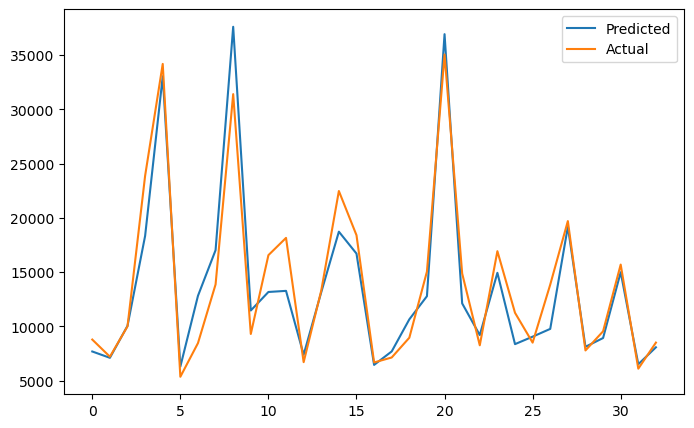

In [53]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
# plt.show()

In [54]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001, max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [55]:
lasso.score(X_train, y_train)

0.9110085744610568

In [56]:
y_pred_lasso=lasso.predict(X_test)
y_pred_lasso

array([3.89125448, 3.84783344, 4.0127288 , 4.25445132, 4.50797733,
       3.79143213, 4.11155396, 4.23729598, 4.41544979, 4.05405562,
       4.12981725, 4.14767714, 3.86045595, 4.11344003, 4.27422271,
       4.25047154, 3.81562687, 3.8874561 , 4.00975921, 4.12353782,
       4.54648747, 4.08665052, 3.96116469, 4.17373452, 3.9218481 ,
       3.95360994, 3.99879035, 4.29267667, 3.92202   , 3.97939624,
       4.1761461 , 3.8141271 , 3.91246567])

In [57]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 5680744.233566406
RMSE : 2383.4311891821853


In [58]:
lasso.score(X_test,y_test)

0.8943674148757419